In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import multivariate_normal

# Rejection sampling

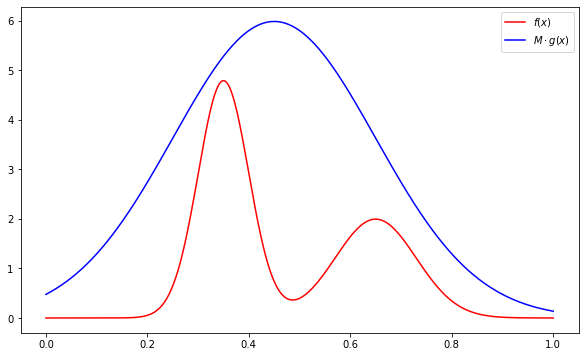

In [2]:
# Exemplo retirado de https://www.data-blogger.com/2016/01/24/the-mathematics-behind-rejection-sampling/

# The multiplication constant to make our probability estimation fit
M = 3

# The target probability density function
f = lambda x: 0.6 * norm.pdf(x, 0.35, 0.05) + 0.4 * norm.pdf(x, 0.65, 0.08)

# The approximated probability density function
g = lambda x: norm.pdf(x, 0.45, 0.2)


# Make the plots
fig, ax = plt.subplots(1, 1, figsize=(10,6))

# The x coordinates
x = np.linspace(0, 1, 500)

# The target probability function
ax.plot(x, f(x), 'r-', label='$f(x)$')

# The approximated probability density function
ax.plot(x, M * g(x), 'b-', label='$M \cdot g(x)$')

# Show the legend
plt.legend()

Text(0.5, 1.0, 'Rejection sampling')

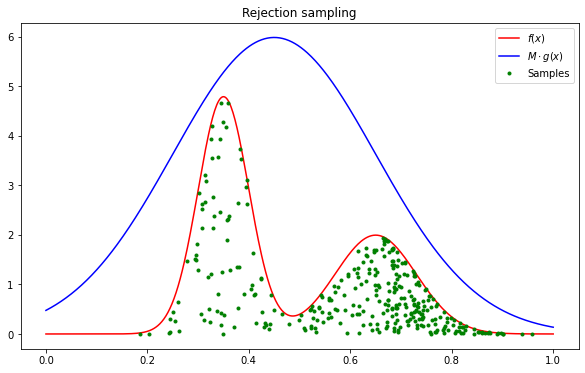

In [3]:
# Number of samples to draw from the probability estimation function
N = 5000

# A number of samples, drawn from the approximated probability density function
x_samples = M * np.random.normal(0.45, 0.2, (N,))

# A number of samples in the interval [0, 1]
u = np.random.uniform(0, 1, (N, ))

# Now examine all the samples and only use the samples found by rejection sampling
samples = [(x_samples[i], u[i] * M * g(x_samples[i])) for i in range(N) if u[i] < f(x_samples[i]) / (M * g(x_samples[i]))]


# Make the plots
fig, ax = plt.subplots(1, 1, figsize=(10,6))

# The target probability function
ax.plot(x, f(x), 'r-', label='$f(x)$')

# The approximated probability density function
ax.plot(x, M * g(x), 'b-', label='$M \cdot g(x)$')

# The samples found by rejection sampling
ax.plot([sample[0] for sample in samples], [sample[1] for sample in samples], 'g.', label='Samples')

# Show the legend
plt.legend()

# Set the title
plt.title('Rejection sampling')

# Importance sampling

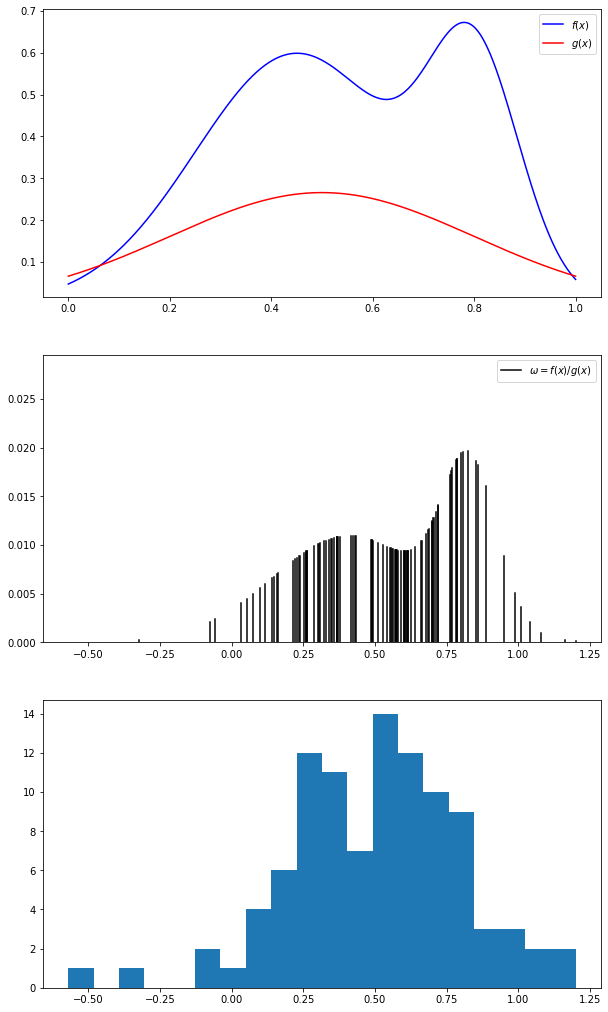

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(10,18))

f = lambda x: 0.3 * norm.pdf(x, 0.45, 0.2) + 0.12 * norm.pdf(x, 0.8, 0.09)
g = lambda x: 0.2 * norm.pdf(x, 0.5, 0.3)

# The target probability function
ax[0].plot(x, f(x), 'b-', label='$f(x)$')

# The approximated probability density function
ax[0].plot(x, g(x), 'r-', label='$g(x)$')

P = 100
x_particles = np.random.normal(0.5, 0.3, (P,))
#x_particles = np.linspace(0, 1, P)

w_particles_unnormalized = f(x_particles) / g(x_particles)
w_particles = w_particles_unnormalized / w_particles_unnormalized.sum()

ax[0].legend()


# Amostras ponderadas
ax[1].plot([], [], 'k', label='$\omega = f(x)/g(x)$')
for p in range(P):
    ax[1].plot( [x_particles[p], x_particles[p]], [0, w_particles[p]], 'k')

ax[1].set_ylim(0, 1.5*np.max(w_particles))
ax[1].legend()


# Histograma apenas para ver que a distruição segue g(x)    
a = ax[2].hist(x_particles, bins=20)

# Para praticar

- Implementar a reamostragem baseada nos pesos das partículas.
- Fazer a localização considerando robôs com 2 e 3 DoF.